In [7]:
#import stuff you eventually need
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array

import imp
CC = imp.load_source('CC_inclusive_2D_lib','CC_inclusive_2D_lib.py')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [2]:
inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/' # please give here path to inputfile
outputdir = inputdir+'plots/' 
# make output dir if not existing
try:
    os.stat(outputdir)
except:
    os.mkdir(outputdir)
RootFile = ROOT.TFile(outputdir+"result_histo.root","RECREATE");


f = ROOT.TFile.Open(inputdir+'FF_detsys.root', 'read')


In [17]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
h_true = f.Get('h_gen_cv')

#frac_det = CC.return_detsys_covar(h_true,2.144e+20)
#frac_other = return_other_covar(h_true,2.144e+20)
#frac_det_all,bkg_all = CC.return_all_covar(h_true,2.144e+20)
#frac_det_flux = return_flux_covar(h_true,2.144e+20)
#frac_crt = return_crt_covar(h_true,2.144e+20)
#frac_dirt = return_dirt_covar(h_true,2.144e+20)
frac_pot = CC.return_pot_covar(h_true,2.144e+20)
#frac_stat = return_stat_covar(h_true,2.144e+20)

#np.save(outputdir+'frac_det',frac_det)
#np.save(outputdir+'frac_other',frac_other)
#np.save(outputdir+'frac_det_all',frac_det_all)
#np.save(outputdir+'bkg_all',bkg_all)
#np.save(outputdir+'frac_det_flux',frac_det_flux)
#np.save(outputdir+'frac_crt',frac_crt)
#np.save(outputdir+'frac_dirt',frac_dirt)
#np.save(outputdir+'frac_stat',frac_stat)
np.save(outputdir+'frac_pot',frac_pot)

frac_det = np.load(outputdir+'frac_det.npy')
frac_other = np.load(outputdir+'frac_other.npy')
frac_det_all = np.load(outputdir+'frac_det_all.npy')
#bkg_all = np.load(outputdir+'bkg_all.npy')
frac_det_flux = np.load(outputdir+'frac_det_flux.npy')
frac_crt = np.load(outputdir+'frac_crt.npy')
frac_dirt = np.load(outputdir+'frac_dirt.npy')
frac_stat = np.load(outputdir+'frac_stat.npy')
#frac_pot = np.load(outputdir+'frac_pot.npy')

print frac_pot

[[0.0003634  0.00035672 0.00034506 ... 0.00037605 0.00037727 0.        ]
 [0.00035672 0.00035015 0.00033871 ... 0.00036913 0.00037033 0.        ]
 [0.00034506 0.00033871 0.00032764 ... 0.00035707 0.00035823 0.        ]
 ...
 [0.00037605 0.00036913 0.00035707 ... 0.00038914 0.0003904  0.        ]
 [0.00037727 0.00037033 0.00035823 ... 0.0003904  0.00039166 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).


In [12]:
frac_tot = frac_det+frac_other+frac_det_all+frac_det_flux+frac_crt+frac_dirt+frac_stat

Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).


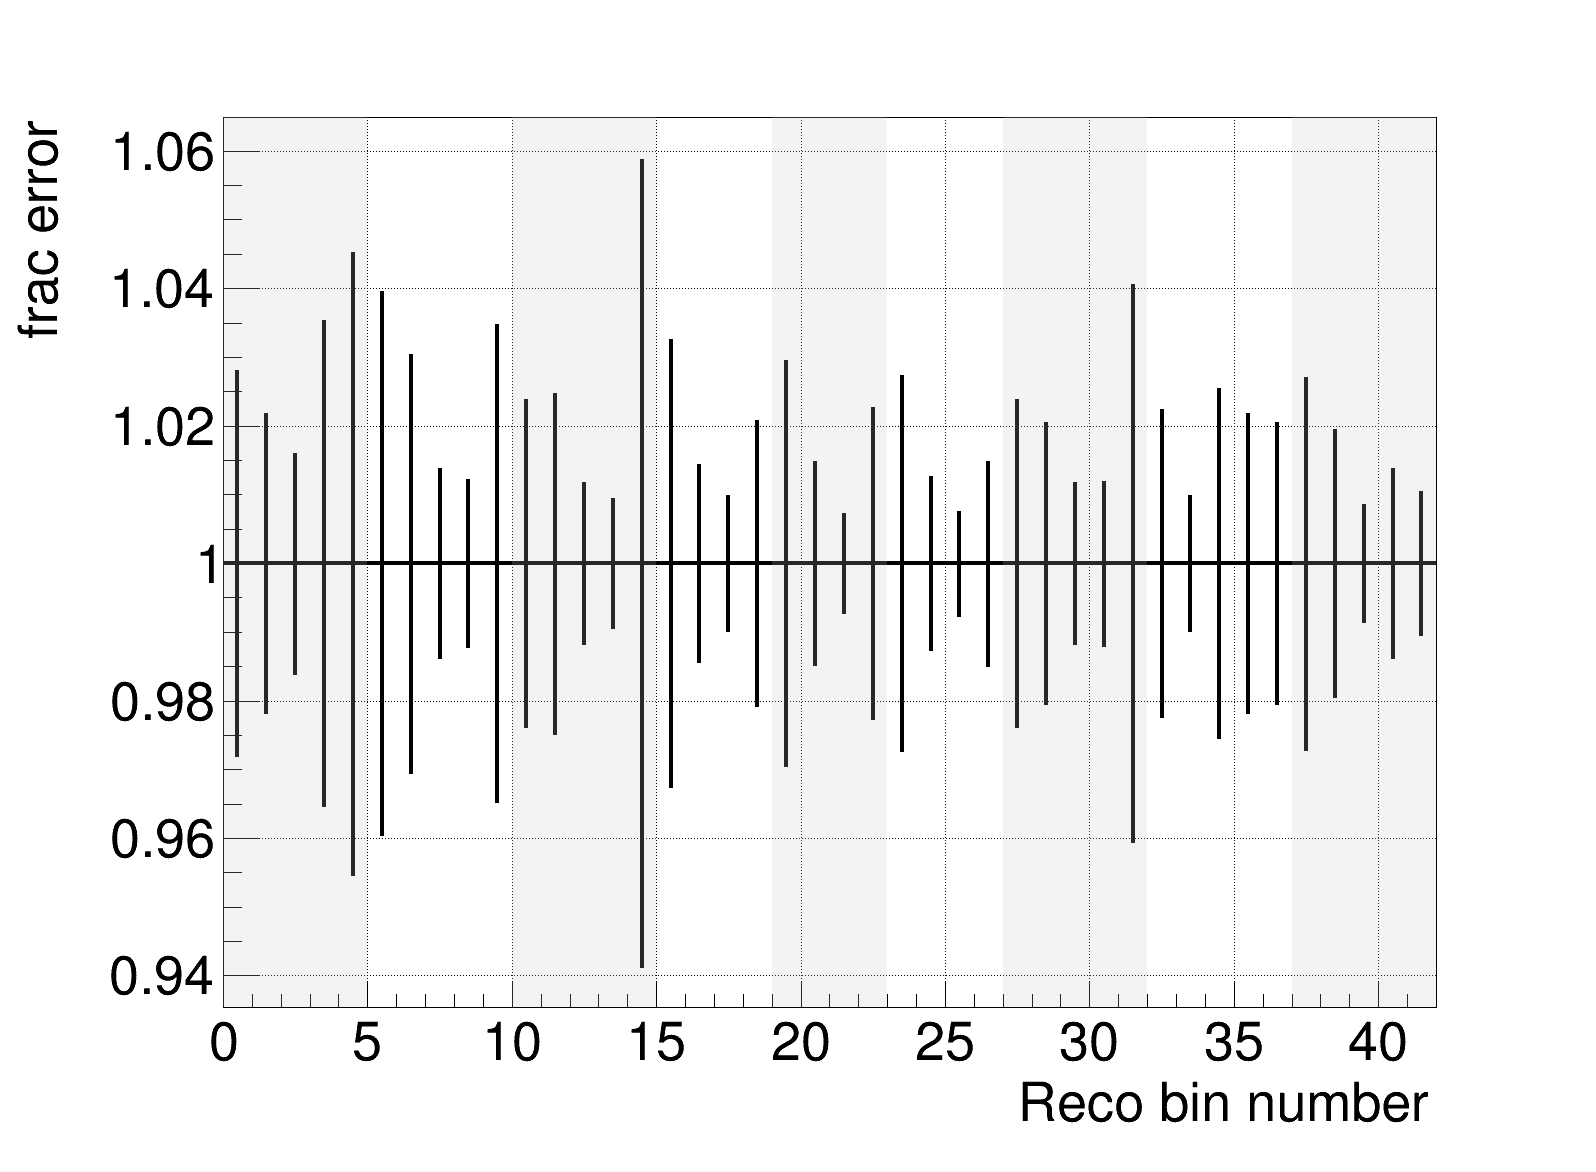

In [19]:
h_frac = CC.plot_err_array(frac_other)
h_frac.Draw()
h_histo = CC.histBkg(h_frac)
h_histo.Draw('hist same')
c1.Draw()

In [20]:
h_true = f.Get('h_gen_cv')
h_data = f.Get('h_data')


In [ ]:
chi2 = CC.my_chi2(h_data, h_true,2.144e+20,frac_tot)
print chi2

In [ ]:
chi2_nMinus1 = CC.chi2_minus1(h_data, h_true,2.144e+20,frac_tot)
print chi2_nMinus1
print chi2_nMinus1.size

In [ ]:
CC.eventrate_comparison(h_data,h_true,2.144e+20,frac_tot, 'EventRate_G3uB','G3 uB')

# Instructions

Here is the numu CC inclusive result using Run 3 data from the MicroBooNE detector
The script should assists for comparison of models to the data of this analysis inclusing all systematics evaluated.

For this reason a python library is provided here along with the measured data points as well as the prediction form the base simulation of the experiment.

Additionally there are all varied historgrams for the calculation of uncertainties.

An example of how the library can be used is given in example.py. Just replace the histogram of the true distibution with a new one and let it run. It will calculate chi2 and make an event rate plot using the new signal event rate prediction.

The POT of the data is 2.144e+20.

For questions get in contact with: thomas.mettler@lhep.unibe.ch

In [ ]:

para = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']

h_true_cv = h_true.Clone()
h_bkg_cv = f_in.Get('h_bkg_detcv')
h_bkg_cv.Scale(this_pot/9.457e+18)
h_smear_cv = f_in.Get('h_smear_cv')

h_ext = f_in.Get('h_ext_cv')
h_dirt = f_in.Get('h_dirt_cv')
h_ext.Scale(this_pot/2.144e+20)
h_dirt.Scale(this_pot/2.144e+20)

ext_vec = plot2arr(h_ext,1)
dirt_vec = plot2arr(h_dirt,1)

num_bins = h_smear_cv.GetNbinsX()
smear_mat = plot2arr(h_smear_cv,2)
true_vec = plot2arr(h_true_cv,1)
bkg_vec = plot2arr(h_bkg_cv,1)

reco_vec = true_vec.dot(smear_mat)

bkg_vec_det = np.zeros((len(para),num_bins))
reco_vec_det = np.zeros((len(para),num_bins))
smear_mat_det = np.zeros((len(para),num_bins,num_bins))

res_vec_det = np.zeros((len(para),num_bins)) # residual
res_vec = np.zeros((num_bins)) # quadratic sum

h_det = []
h_bkg_det = []
h_smear_det = []

#print 'go into loop'
for i,x in enumerate(para):
    h_bkg_det.append(f_in.Get('h_bkg_'+x))
    h_bkg_det[i].Scale(this_pot/9.457e18)
    h_smear_det.append(f_in.Get('h_smear_'+x))

    bkg_vec_det[i] = plot2arr(h_bkg_det[i],1)
    smear_mat_det[i] = plot2arr(h_smear_det[i],2)

    reco_vec_det[i]= true_vec.dot(smear_mat_det[i])
    #print reco_vec[1],bkg_vec[1], reco_vec_det[i][1] , bkg_vec_det[i][1]
    res_vec_det[i] = ((reco_vec+bkg_vec) - (reco_vec_det[i] + bkg_vec_det[i]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)

    for j in range(num_bins):
        res_vec[j] += res_vec_det[i][j]*res_vec_det[i][j]

frac_covar_det = np.zeros((num_bins,num_bins))
for i,x in enumerate(para):
    for j in range(num_bins):
        for k in range(num_bins):
            frac_covar_det[j][k] += res_vec_det[i][j] * res_vec_det[i][k]

